In [296]:
import pandas as pd  
import numpy as np  

import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

import matplotlib.pyplot as plt  
import seaborn
%matplotlib inline

import plotly.express as px
import plotly.graph_objects as go


In [297]:
#xfile='rsi_macd_1H_SET50-SignalAndMA-RSI_10.csv'
#xfile='rsi_macd_1H_SET50_Signal18And38.csv'

xfile='S50F_MACD-RSI_1H_TestSingal2_10And25.csv'
fileNamePath="dataset/"+xfile

df_set50=pd.read_csv(fileNamePath,index_col='Date/Time',parse_dates =['Date/Time'],dayfirst=True)

#optimize
#df_set50=pd.read_csv("dataset/rsi_macd_1H_SET50_Optimize_FirstCAGR.csv",index_col='DateTime',parse_dates =['DateTime'],dayfirst=True)

df_set50.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22907 entries, 2006-06-01 15:30:00 to 2019-10-21 16:00:00
Data columns (total 21 columns):
Ticker             22907 non-null object
MACD1              22882 non-null float64
Signal1            22872 non-null float64
Hist1              22872 non-null float64
MACD2              22857 non-null float64
Signal2            22847 non-null float64
Hist2              22847 non-null float64
Signal_2_Test25    22832 non-null float64
Hist_2_Test25      22832 non-null float64
rsi                22892 non-null float64
rsi_ma             22883 non-null float64
rsi2               22877 non-null float64
rsi_ma2            22868 non-null float64
rsi-d              22805 non-null float64
ma_rsi-d           22742 non-null float64
macd-d             22735 non-null float64
signal-d           22665 non-null float64
hist-d             22665 non-null float64
macd-d2            22560 non-null float64
signal-d2          22491 non-null float64
hist-d2          

In [298]:
df_set50.tail(5)

,Ticker,MACD1,Signal1,Hist1,MACD2,Signal2,Hist2,Signal_2_Test25,Hist_2_Test25,rsi,...,rsi2,rsi_ma2,rsi-d,ma_rsi-d,macd-d,signal-d,hist-d,macd-d2,signal-d2,hist-d2
Date/Time,,,,,,,,,,,,,,,,,,,,,
2019-10-21 11:00:00,S50IF_CON,0.94,1.70,-0.76,2.71,2.97,-0.26,2.51,0.19,50.40,...,53.35,55.22,51.76,46.16,-1.49,-4.3,2.81,-5.53,-6.21,0.69
2019-10-21 12:00:00,S50IF_CON,0.55,1.49,-0.94,2.53,2.89,-0.36,2.52,0.01,46.29,...,51.38,54.44,51.76,46.16,-1.49,-4.3,2.81,-5.53,-6.21,0.69
2019-10-21 14:15:00,S50IF_CON,0.11,1.24,-1.13,2.30,2.78,-0.48,2.50,-0.20,43.18,...,49.81,54.05,51.76,46.16,-1.49,-4.3,2.81,-5.53,-6.21,0.69
2019-10-21 15:00:00,S50IF_CON,-0.28,0.96,-1.24,2.08,2.65,-0.57,2.47,-0.39,42.10,...,49.26,53.57,51.76,46.16,-1.49,-4.3,2.81,-5.53,-6.21,0.69
2019-10-21 16:00:00,S50IF_CON,-0.61,0.68,-1.29,1.86,2.51,-0.65,2.42,-0.56,41.22,...,48.81,53.08,51.76,46.16,-1.49,-4.3,2.81,-5.53,-6.21,0.69


In [299]:
des_df_set50=df_set50.describe()
des_df_set50.to_csv(f'des-csv/des_all_{xfile}')

des_df_set50

,MACD1,Signal1,Hist1,MACD2,Signal2,Hist2,Signal_2_Test25,Hist_2_Test25,rsi,rsi_ma,rsi2,rsi_ma2,rsi-d,ma_rsi-d,macd-d,signal-d,hist-d,macd-d2,signal-d2,hist-d2
count,22882.000000,22872.000000,22872.000000,22857.000000,22847.000000,22847.000000,22832.000000,22832.000000,22892.000000,22883.000000,22877.000000,22868.000000,22805.000000,22742.000000,22735.000000,22665.000000,22665.000000,22560.000000,22491.000000,22491.000000
mean,0.193636,0.195001,0.001245,0.327078,0.329278,0.002377,0.331210,0.004841,51.645985,51.650094,51.498887,51.504783,52.819107,52.836565,1.418501,1.430540,-0.000193,2.394094,2.401686,-0.010925
std,4.590395,4.229683,1.613443,5.085904,4.950100,1.049021,4.601992,2.074633,12.891148,11.694223,9.251978,8.783121,11.337932,10.158288,11.391921,10.484235,4.062443,12.747304,12.434449,2.600702
min,-26.750000,-21.810000,-10.540000,-23.990000,-22.180000,-5.580000,-18.760000,-9.620000,7.960000,15.070000,14.030000,20.770000,15.620000,27.880000,-43.900000,-39.220000,-16.590000,-46.890000,-43.070000,-10.430000
25%,-2.240000,-2.050000,-0.910000,-2.460000,-2.410000,-0.600000,-2.270000,-1.240000,42.560000,43.270000,45.180000,45.360000,45.030000,45.900000,-5.060000,-4.680000,-2.340000,-5.150000,-4.840000,-1.580000
50%,0.590000,0.560000,-0.040000,0.820000,0.850000,-0.010000,0.860000,-0.020000,52.080000,52.080000,51.710000,51.720000,52.890000,52.840000,2.460000,2.520000,0.130000,3.310000,3.350000,0.160000
75%,3.010000,2.820000,0.880000,3.690000,3.610000,0.580000,3.430000,1.200000,60.890000,59.970000,58.020000,57.810000,61.100000,60.050000,9.150000,8.570000,2.510000,11.570000,11.380000,1.690000
max,21.470000,18.270000,11.730000,17.840000,17.150000,5.350000,16.390000,9.850000,93.560000,89.700000,89.500000,86.210000,86.370000,81.810000,28.120000,24.260000,17.280000,29.950000,27.810000,9.530000


In [314]:
#Sample data from population
fromD='2018'
x_dataset=df_set50[
    fromD:]
x_dataset.shape[0]

3119

In [315]:
a="MACD"
b="Signal2"
#b="Signal_2_Test25"

c="rsi2"
d="rsi_ma2"


In [316]:
x_dataset.head()

,Ticker,MACD1,Signal1,Hist1,MACD2,Signal2,Hist2,Signal_2_Test25,Hist_2_Test25,rsi,...,rsi2,rsi_ma2,rsi-d,ma_rsi-d,macd-d,signal-d,hist-d,macd-d2,signal-d2,hist-d2
Date/Time,,,,,,,,,,,,,,,,,,,,,
2018-01-03 09:45:00,S50IF_CON,-0.43,-0.06,-0.38,2.44,3.15,-0.71,3.97,-1.53,54.86,...,56.28,52.92,68.28,72.39,12.58,11.65,0.93,14.51,13.05,1.46
2018-01-03 10:00:00,S50IF_CON,0.64,0.07,0.57,2.70,3.07,-0.37,3.87,-1.17,63.70,...,61.57,54.00,68.28,72.39,12.58,11.65,0.93,14.51,13.05,1.46
2018-01-03 11:00:00,S50IF_CON,2.23,0.46,1.76,3.21,3.09,0.11,3.82,-0.62,70.44,...,66.17,55.51,68.28,72.39,12.58,11.65,0.93,14.51,13.05,1.46
2018-01-03 12:00:00,S50IF_CON,3.51,1.02,2.49,3.69,3.20,0.49,3.81,-0.12,71.28,...,66.78,56.90,68.28,72.39,12.58,11.65,0.93,14.51,13.05,1.46
2018-01-03 14:15:00,S50IF_CON,5.07,1.75,3.32,4.33,3.41,0.93,3.85,0.48,75.42,...,69.86,58.39,68.28,72.39,12.58,11.65,0.93,14.51,13.05,1.46


In [317]:
des_x_dataset=x_dataset.describe()
des_x_dataset.to_csv(f'des-csv/des_df_set50_{fromD}_{xfile}')
des_x_dataset

,MACD1,Signal1,Hist1,MACD2,Signal2,Hist2,Signal_2_Test25,Hist_2_Test25,rsi,rsi_ma,rsi2,rsi_ma2,rsi-d,ma_rsi-d,macd-d,signal-d,hist-d,macd-d2,signal-d2,hist-d2
count,3119.000000,3119.000000,3119.000000,3119.000000,3119.000000,3119.000000,3119.000000,3119.000000,3119.000000,3119.000000,3119.000000,3119.000000,3119.000000,3119.000000,3119.000000,3119.000000,3119.000000,3119.000000,3119.000000,3119.000000
mean,-0.122934,-0.123799,0.000927,-0.199695,-0.198557,-0.001116,-0.193290,-0.006486,50.108205,50.108160,50.016242,50.017974,50.420955,50.668304,-0.351844,-0.189878,-0.161898,0.239009,0.424998,-0.185470
std,4.188673,3.875407,1.437542,4.816671,4.706750,0.928949,4.415831,1.859401,12.608993,11.338551,9.088755,8.611191,10.766895,9.772016,10.438032,9.427952,4.163469,10.390150,10.041293,2.595548
min,-15.250000,-12.350000,-4.880000,-13.250000,-12.500000,-2.820000,-11.330000,-5.160000,10.560000,18.470000,18.640000,25.080000,22.160000,29.240000,-29.980000,-25.710000,-9.780000,-26.380000,-24.290000,-7.040000
25%,-2.990000,-2.950000,-0.960000,-3.585000,-3.495000,-0.670000,-3.230000,-1.360000,40.920000,41.570000,43.360000,43.850000,42.780000,43.490000,-7.435000,-6.160000,-3.240000,-6.830000,-6.280000,-1.820000
50%,0.110000,0.070000,-0.090000,0.030000,-0.060000,-0.050000,-0.020000,-0.140000,50.260000,50.580000,50.070000,50.140000,50.230000,50.120000,0.130000,0.390000,-0.250000,0.890000,1.190000,-0.160000
75%,2.660000,2.330000,0.935000,3.230000,3.185000,0.600000,2.945000,1.260000,59.250000,58.120000,56.315000,56.215000,57.640000,56.685000,6.510000,6.100000,2.850000,6.010000,5.620000,1.580000
max,13.050000,10.610000,6.010000,11.200000,10.580000,3.320000,9.910000,5.500000,85.930000,81.350000,76.740000,73.970000,82.770000,75.670000,22.500000,20.220000,11.590000,24.730000,23.550000,6.730000


In [318]:
x_dataset.columns

Index(['Ticker', 'MACD1', 'Signal1', 'Hist1', 'MACD2', 'Signal2', 'Hist2',
       'Signal_2_Test25', 'Hist_2_Test25', 'rsi', 'rsi_ma', 'rsi2', 'rsi_ma2',
       'rsi-d', 'ma_rsi-d', 'macd-d', 'signal-d', 'hist-d', 'macd-d2',
       'signal-d2', 'hist-d2'],
      dtype='object')

In [319]:
exCol=columns=['Ticker','Hist1','Hist2','Hist_2_Test25','hist-d','hist-d2'];
myCol=[ c for c in  x_dataset.columns if  c not in exCol ]
x_dataset=x_dataset[myCol]
x_dataset.head()

,MACD1,Signal1,MACD2,Signal2,Signal_2_Test25,rsi,rsi_ma,rsi2,rsi_ma2,rsi-d,ma_rsi-d,macd-d,signal-d,macd-d2,signal-d2
Date/Time,,,,,,,,,,,,,,,
2018-01-03 09:45:00,-0.43,-0.06,2.44,3.15,3.97,54.86,46.76,56.28,52.92,68.28,72.39,12.58,11.65,14.51,13.05
2018-01-03 10:00:00,0.64,0.07,2.70,3.07,3.87,63.70,48.98,61.57,54.00,68.28,72.39,12.58,11.65,14.51,13.05
2018-01-03 11:00:00,2.23,0.46,3.21,3.09,3.82,70.44,51.81,66.17,55.51,68.28,72.39,12.58,11.65,14.51,13.05
2018-01-03 12:00:00,3.51,1.02,3.69,3.20,3.81,71.28,54.34,66.78,56.90,68.28,72.39,12.58,11.65,14.51,13.05
2018-01-03 14:15:00,5.07,1.75,4.33,3.41,3.85,75.42,56.88,69.86,58.39,68.28,72.39,12.58,11.65,14.51,13.05


In [320]:
Rsi_Macd_Df=x_dataset.corr(method ='pearson') 
Rsi_Macd_Df.to_csv(f'corr-csv/corr_{fromD}_{xfile}')

Rsi_Macd_Df



,MACD1,Signal1,MACD2,Signal2,Signal_2_Test25,rsi,rsi_ma,rsi2,rsi_ma2,rsi-d,ma_rsi-d,macd-d,signal-d,macd-d2,signal-d2
MACD1,1.000000,0.939369,0.816199,0.689501,0.545898,0.873678,0.948884,0.911432,0.891286,0.622759,0.140846,0.255832,0.012369,0.004272,-0.094321
Signal1,0.939369,1.000000,0.916415,0.835363,0.697417,0.726561,0.935423,0.852097,0.944873,0.690655,0.208141,0.348502,0.062770,0.042844,-0.081545
MACD2,0.816199,0.916415,1.000000,0.981240,0.922489,0.636016,0.814359,0.845778,0.946260,0.839976,0.451735,0.595968,0.269429,0.185297,0.002554
Signal2,0.689501,0.835363,0.981240,1.000000,0.974268,0.505769,0.704256,0.756127,0.888821,0.845189,0.519306,0.661738,0.333635,0.230871,0.034685
Signal_2_Test25,0.545898,0.697417,0.922489,0.974268,1.000000,0.393520,0.564140,0.667879,0.798406,0.856226,0.630675,0.755332,0.443308,0.307255,0.095020
rsi,0.873678,0.726561,0.636016,0.505769,0.393520,1.000000,0.830934,0.938530,0.745933,0.500552,0.080886,0.161385,-0.031158,-0.038775,-0.112072
rsi_ma,0.948884,0.935423,0.814359,0.704256,0.564140,0.830934,1.000000,0.894837,0.939928,0.639389,0.144184,0.258132,0.007122,-0.007009,-0.109518
rsi2,0.911432,0.852097,0.845778,0.756127,0.667879,0.938530,0.894837,1.000000,0.910543,0.721284,0.286981,0.388984,0.121561,0.069030,-0.064144
rsi_ma2,0.891286,0.944873,0.946260,0.888821,0.798406,0.745933,0.939928,0.910543,1.000000,0.810690,0.364086,0.484131,0.181112,0.115123,-0.042807
rsi-d,0.622759,0.690655,0.839976,0.845189,0.856226,0.500552,0.639389,0.721284,0.810690,1.000000,0.805598,0.862748,0.659248,0.543804,0.352981


In [321]:
def plotCorr(df):

 fig, ax = plt.subplots(figsize=(7,7))         # Sample figsize in inches
    
 mask = np.zeros_like(df)

 mask[np.triu_indices_from(mask)] = True
    
 seaborn.heatmap(df, cmap='RdYlGn', vmax=1.0, vmin=-1.0 , mask = mask, linewidths=2.5 ,ax=ax)

 plt.yticks(rotation=0) 

 plt.xticks(rotation=90) 

 plt.show() 

In [322]:
def miniPlotCorr(x):
 plt.matshow(x)
 plt.xticks(range(len(x.columns)), x.columns)
 plt.yticks(range(len(x.columns)), x.columns)
 plt.colorbar()
 plt.show()

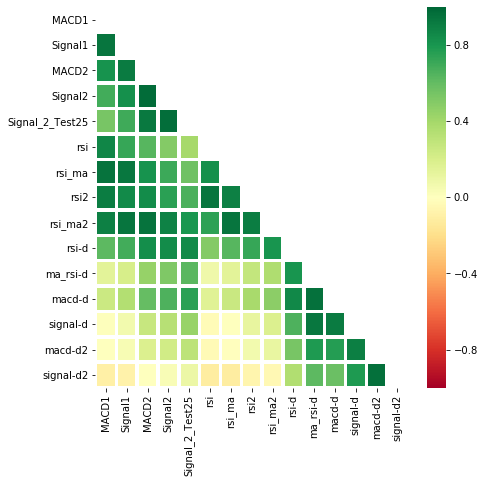

In [323]:
plotCorr(Rsi_Macd_Df)

test from  2018
            MACD1   Signal1       rsi    rsi_ma
MACD1    1.000000  0.939369  0.873678  0.948884
Signal1  0.939369  1.000000  0.726561  0.935423
rsi      0.873678  0.726561  1.000000  0.830934
rsi_ma   0.948884  0.935423  0.830934  1.000000


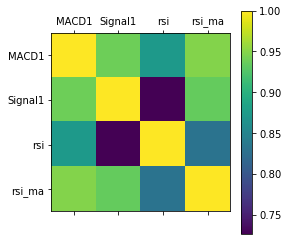

In [324]:
myColIndex_View1=['MACD1','Signal1','rsi','rsi_ma']

# specigy index but look all col
#Rsi_Macd_Df.loc[myColIndex_View1,  ]

#plotCorr(Rsi_Macd_Df.loc[myColIndex_View1, myColIndex_View1 ])
print('test from ',fromD )
print(Rsi_Macd_Df.loc[myColIndex_View1, myColIndex_View1 ])
miniPlotCorr( Rsi_Macd_Df.loc[myColIndex_View1, myColIndex_View1 ])


test from  2018
                    MACD2   Signal2      rsi2   rsi_ma2  Signal_2_Test25
MACD2            1.000000  0.981240  0.845778  0.946260         0.922489
Signal2          0.981240  1.000000  0.756127  0.888821         0.974268
rsi2             0.845778  0.756127  1.000000  0.910543         0.667879
rsi_ma2          0.946260  0.888821  0.910543  1.000000         0.798406
Signal_2_Test25  0.922489  0.974268  0.667879  0.798406         1.000000


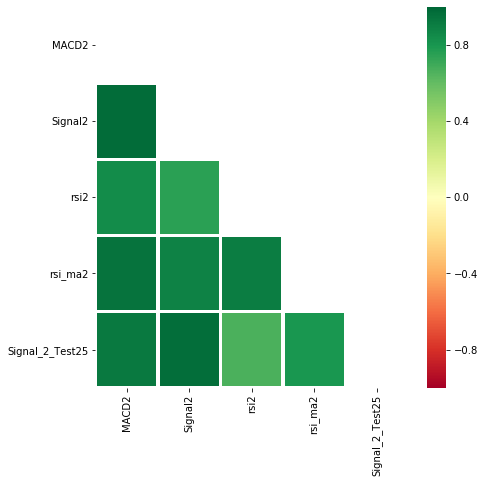

In [325]:
myColIndex_View2=['MACD2','Signal2','rsi2','rsi_ma2','Signal_2_Test25']
print('test from ',fromD )
print(Rsi_Macd_Df.loc[myColIndex_View2,myColIndex_View2])

plotCorr(Rsi_Macd_Df.loc[myColIndex_View2,myColIndex_View2])

            MACD2   Signal2      rsi2   rsi_ma2  Signal_2_Test25
MACD1    0.816199  0.689501  0.911432  0.891286         0.545898
Signal1  0.916415  0.835363  0.852097  0.944873         0.697417
rsi      0.636016  0.505769  0.938530  0.745933         0.393520
rsi_ma   0.814359  0.704256  0.894837  0.939928         0.564140


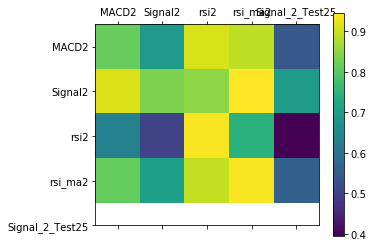

In [326]:
print(Rsi_Macd_Df.loc[myColIndex_View1, myColIndex_View2 ])
miniPlotCorr(Rsi_Macd_Df.loc[myColIndex_View1, myColIndex_View2 ])

# Plot by plotly & df.Plot

In [327]:
# Create a scatter plot of Study vs Grade
x_dataset.plot(kind='scatter', title=a+' for '+d, x=a, y=d, color='green',figsize=(10,5))

# Plot the regression line
plt.plot(np.unique(x_dataset[a]), np.poly1d(np.polyfit(x_dataset[a], x_dataset[d], 1))(np.unique(x_dataset[a])))
plt.show()

KeyError: 'MACD'

In [ ]:
fig=px.scatter(x_dataset,x=a,y=d,)

fig.show()

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import plotly.figure_factory as ff




fig=make_subplots(rows=2,cols=2)

fig.add_trace(
go.Histogram(x=x_dataset[a],name=a),row=1,col=1
)

fig.add_trace(
go.Histogram(x=x_dataset[b],name=b),row=1,col=2
)

fig.add_trace(
go.Histogram(x=x_dataset[c],name=c),row=2,col=1
)

fig.add_trace(
go.Histogram(x=x_dataset[d],name=d),row=2,col=2
)



# Linear Reg By sklearn

In [ ]:
x_dataset.columns

In [ ]:
myX="Signal1"

myY="Signal_2_Test25"

In [ ]:
X=x_dataset[myX].values.reshape(-1,1)
Y=x_dataset[myY].values.reshape(-1,1)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.4,random_state=0)

In [ ]:
myRegessor=LinearRegression()
myRegessor.fit(X_train,y_train)

In [ ]:
#To retrieve the intercept:
print(myRegessor.intercept_)
#For retrieving the slope:
print(myRegessor.coef_)

In [ ]:
y_predict=myRegessor.predict(X_test)

In [ ]:
df_Actual_Predit=pd.DataFrame({
'ActualResult':y_test.flatten(),
'PredictedResult':y_predict.flatten()
})
df_Actual_Predit.sample(20)

In [ ]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_predict, color='red', linewidth=2)
plt.show()


In [ ]:
dfSample=df_Actual_Predit.tail(25)
dfSample.plot(kind='bar',figsize=(10,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
print(X_test[:])
print(X_test[:,0])

In [ ]:
test_df=pd.DataFrame( 
{ 
"X_test":X_test[:,0],
"y_test":y_test[:,0]
}
)

test_df
fig=px.scatter(test_df,x='X_test',y='y_test',trendline='lowess')
fig.show()

# The final step is to evaluate the performance of the algorithm. 

This step is particularly important to compare how well different algorithms perform on a particular dataset. For regression algorithms, three evaluation metrics are commonly used:

1. Mean Absolute Error (MAE) is the mean of the absolute value of the errors. It is calculated as:

Mean Absolute Error

2. Mean Squared Error (MSE) is the mean of the squared errors and is calculated as:
Mean Squared Error


3. Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:
Root Mean Squared Error

Luckily, we don’t have to perform these calculations manually. The Scikit-Learn library comes with pre-built functions that can be used to find out these values for us.

Let’s find the values for these metrics using our test data.

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

print('Mean value of the percentages of all the temperature' , x_dataset[myY].mean())
print('10% Mean value of the percentages of all the temperature' , x_dataset[myY].mean()*0.1)

# You can see that the value of root mean squared error is 4.19, which is more than 10% of the mean value of the percentages of all the temperature i.e. 22.41. This means that our algorithm was not very accurate but can still make reasonably good predictions.

In [ ]:
import statsmodels.api as sm

print("data from ",fromD ," to ",x_dataset.index[x_dataset.shape[0]-1])
print("MyX=",myX ,  "  and MyY=",myY)

XXX = sm.add_constant(x_dataset[myX].to_numpy()) # adding a constant
YYY=x_dataset[myY]

XXXYYYY_Model = sm.OLS(YYY, XXX).fit()
predictions = XXXYYYY_Model.predict(XXX) 

XXXYYYY_Summary = XXXYYYY_Model.summary()
print(XXXYYYY_Summary)


In [ ]:
predictions